Let's go through a different metrics for the Filecoin network!

Filecoin data can be obtained from multiple sources. The most reliable data will be the actual nodes. 
However, these won't usually let us get all the historical data we want! For that, we can use services like [Spacescope](https://docs.spacescope.io/).

In [5]:
import requests
import os

import altair as alt
import pandas as pd


## Deals

In [6]:
SPACESCOPE_TOKEN = os.environ.get("SPACESCOPE_TOKEN")


In [22]:
url = "https://api.spacescope.io/v2/deals/deal_size?start_date=2023-04-01&end_date=2023-05-11"

response = requests.request(
    "GET", url, headers={"authorization": f"Bearer {SPACESCOPE_TOKEN}"}, data={}
)


In [32]:
df = pd.DataFrame(response.json()["data"])
df.sample(5)


,stat_date,total_regular_deal_size,total_verified_deal_size,active_regular_deal_size,active_verified_deal_size,daily_activated_regular_deal_size,daily_activated_verified_deal_size,daily_proposed_regular_deal_size,daily_proposed_verified_deal_size,daily_slashed_regular_deal_size,daily_slashed_verified_deal_size,daily_expired_regular_deal_size,daily_expired_verified_deal_size
17,2023-04-18T00:00:00Z,40426394265247200,947898818048623000,1915156104954070,903403376343540000,1071745335296,5341540186161150,1001432023040,4756712686354430,0,238639120384,4448681984,20978417418240
10,2023-04-11T00:00:00Z,40420167292345900,915140786619138000,1905437340391130,869900323686506000,1998868971520,5003364061937660,1193195601920,4353181528588290,291107766272,43764576944128,6529449984,19556156309504
3,2023-04-04T00:00:00Z,40408012940461600,880263039953723000,1893473129933010,832391874292335000,28231860224,5063662188363780,1463795318784,4960259872899070,0,54443810750464,137536702828,57929080504320
0,2023-04-01T00:00:00Z,40403012504348200,865088869088174000,1894132036849890,819441998529528000,509238902272,4013578747633660,886373875712,5300513113374720,0,3253056045056,210973231088,100682071277568
6,2023-04-07T00:00:00Z,40415112723882500,895346491419402000,1898602531006670,848613479767425000,2105670631424,6231177451012100,2062523826176,5036544154927100,0,2693212930048,35373056,27352413224960


In [33]:
df = df.assign(
    stat_date=lambda df: pd.to_datetime(df["stat_date"]),
    # Compute PiB metrics for all _size columns
    **{
        col: lambda df, col=col: df[col] / 1024**5
        for col in df.columns
        if col.endswith("_size")
    }
)
df.sample(5)


,stat_date,total_regular_deal_size,total_verified_deal_size,active_regular_deal_size,active_verified_deal_size,daily_activated_regular_deal_size,daily_activated_verified_deal_size,daily_proposed_regular_deal_size,daily_proposed_verified_deal_size,daily_slashed_regular_deal_size,daily_slashed_verified_deal_size,daily_expired_regular_deal_size,daily_expired_verified_deal_size
4,2023-04-05 00:00:00+00:00,35.891676,786.275871,1.682787,743.376672,0.001076,4.168273,0.002151,4.445235,0.0,0.007150,0.000030,0.036099
40,2023-05-11 00:00:00+00:00,35.921468,939.302819,1.655333,864.607591,0.000061,1.110992,0.000424,4.853475,0.0,0.000273,0.000000,0.000000
33,2023-05-04 00:00:00+00:00,35.917077,904.992290,1.673890,858.777721,0.000636,1.145716,0.000749,4.226393,0.0,0.006102,0.000000,0.000000
16,2023-04-17 00:00:00+00:00,35.904962,837.670229,1.700089,797.667134,0.001203,4.830719,0.000972,4.210865,0.0,0.000999,0.000002,0.010283
27,2023-04-28 00:00:00+00:00,35.913800,879.065716,1.702863,843.237096,0.001151,5.022707,0.000545,2.985855,0.0,0.000061,0.003335,0.050389


In [46]:
# Altair chart of daily_activated_verified_deal_size over time (stat_date)

c = (
    alt.Chart(df)
    .mark_line()
    .encode(
        x="stat_date:T",
        y="daily_activated_verified_deal_size",
        tooltip=["daily_activated_verified_deal_size", "stat_date"],
    )
    .properties(width=800, height=400, title="Daily Activated Verified Deal Size")
).display()


alt.Chart(...)

# Provider Power

In [28]:
provider_power_daily = pd.read_csv(
    "https://sp-power-daily.feeds.provider.quest/provider-power-daily.csv",
    header=None,
    names=["provider", "date", "avg_raw_byte_power", "avg_quality_adj_power"],
    parse_dates=["date"],
)


In [29]:
latest_snapshot = provider_power_daily[
    provider_power_daily["date"] == provider_power_daily["date"].max()
]


In [36]:
latest_snapshot = latest_snapshot.assign(
    avg_raw_byte_power_pib=latest_snapshot["avg_raw_byte_power"] / 1024**5,
    avg_quality_adj_power_pib=latest_snapshot["avg_quality_adj_power"] / 1024**5,
    avg_raw_byte_power_pib_buquet=pd.cut(
        latest_snapshot["avg_raw_byte_power_pib"],
        bins=[0, 0.1, 1, 5, 10, 25, 50],
    ),
).sort_values("avg_raw_byte_power", ascending=False)


<Axes: xlabel='date'>

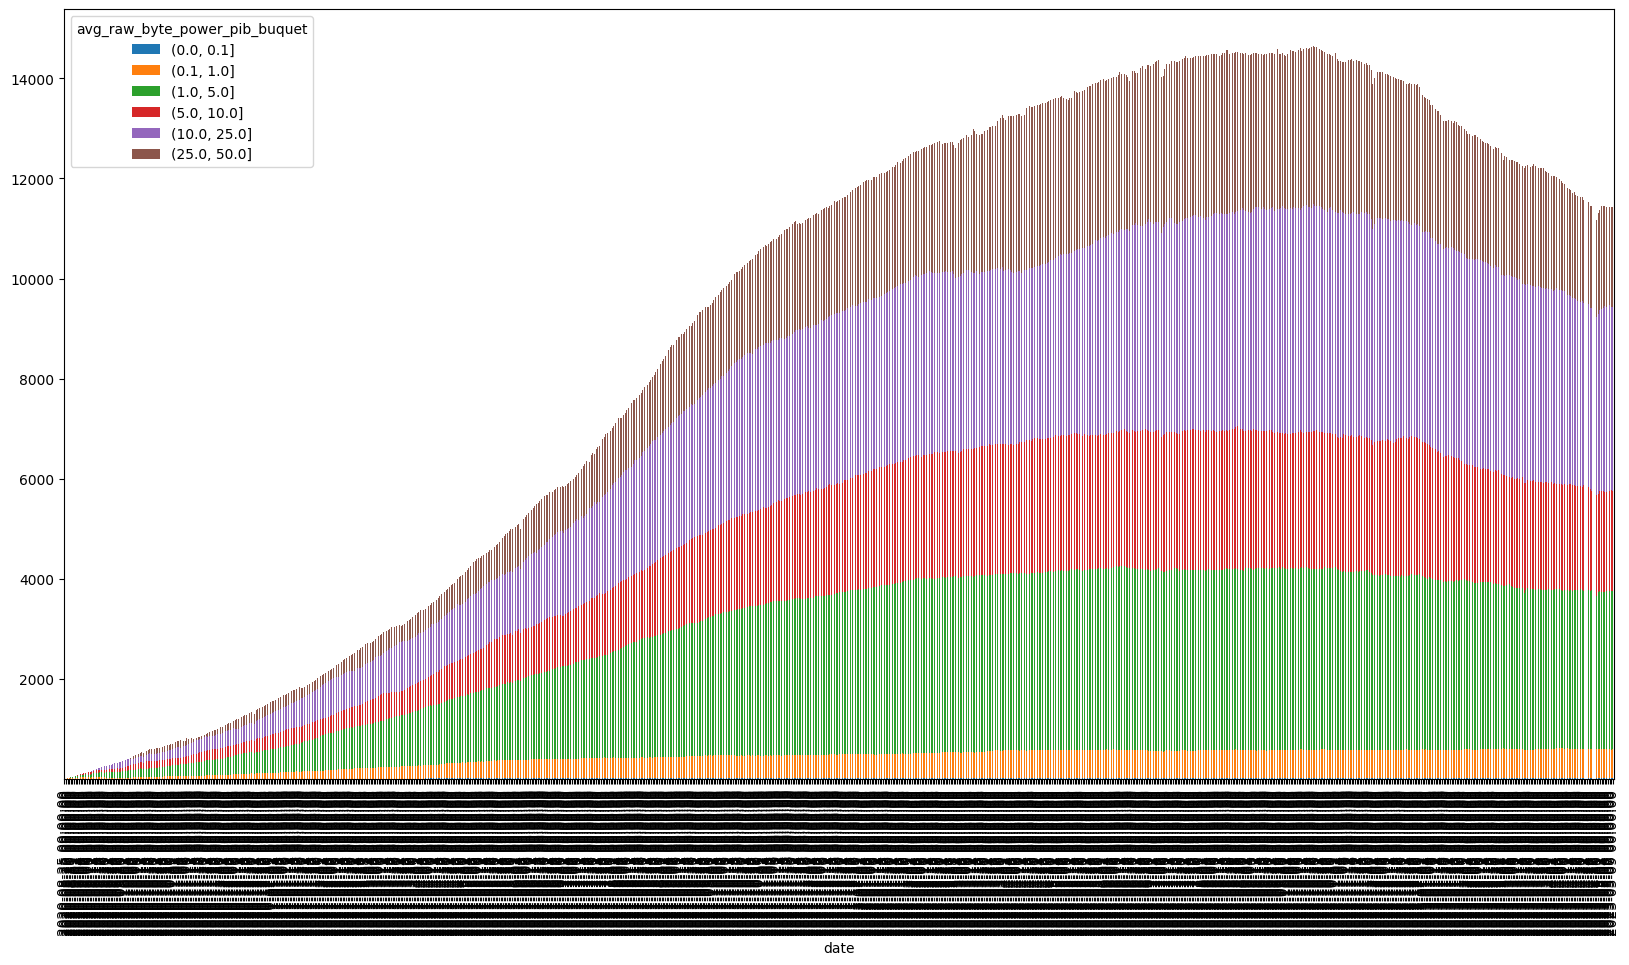

In [37]:
latest_snapshot.groupby(["date", "avg_raw_byte_power_pib_buquet"])[
    "avg_raw_byte_power_pib"
].sum().unstack().plot.bar(stacked=True, figsize=(20, 10))


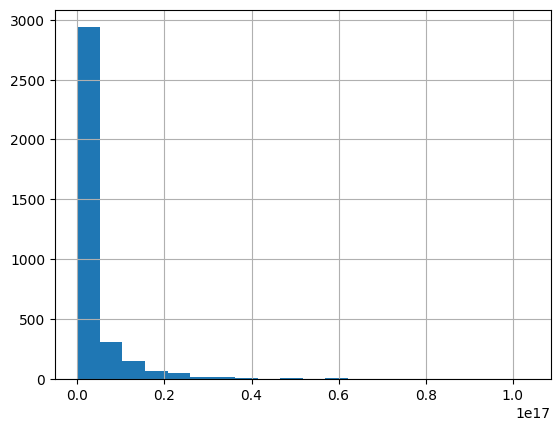

In [14]:
hist = latest_snapshot["avg_raw_byte_power"].hist(bins=20)


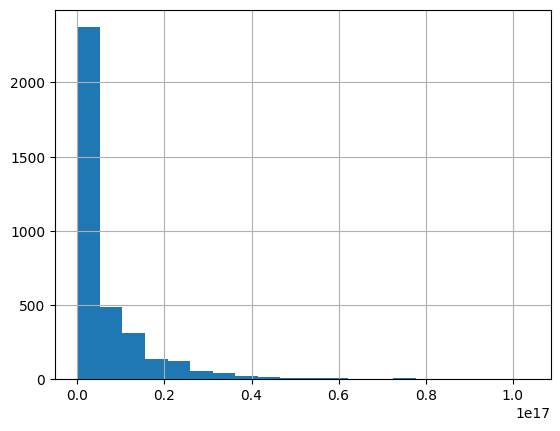

In [15]:
hist = latest_snapshot["avg_quality_adj_power"].hist(bins=20)
